In [1]:
%pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip list

Package                              Version          Editable project location
------------------------------------ ---------------- -------------------------------------------------------------
absl-py                              2.1.0
action-msgs                          1.2.1
action-tutorials-interfaces          0.20.3
action-tutorials-py                  0.20.3
actionlib-msgs                       4.2.3
aenum                                3.1.15
ament-cmake-test                     1.3.8
ament-copyright                      0.12.10
ament-cppcheck                       0.12.10
ament-cpplint                        0.12.10
ament-flake8                         0.12.10
ament-index-python                   1.4.0
ament-lint                           0.12.10
ament-lint-cmake                     0.12.10
ament-package                        0.14.0
ament-pep257                         0.12.10
ament-uncrustify                     0.12.10
ament-xmllint                        0.12.10
angles  

In [4]:
import tensorflow as tf
import os


2024-05-08 11:58:53.079567: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-08 11:58:53.081375: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 11:58:53.153035: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 11:58:53.493480: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 11:58:54.739678: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [5]:
# This piece of code if for configuring gpu utilisation. I  don't have a dedicated gpu so i have this commented out.

# limit gpu consumption to avoid errors like 'out of memory error'
# gpus=tf.config.experimental.list_physical_devices('GPU')
# for unitGPU in gpus:
#     tf.config.experimental.set_memory_growth(unitGPU,True)

# gpus=tf.config.experimental.list_physical_devices('GPU')
# print(gpus)

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [6]:
train_data_dir='PCOS_Train'
os.listdir(train_data_dir)

['healthy', 'unhealthy']

In [7]:
healthyDirectory=os.listdir(os.path.join(train_data_dir,os.listdir(train_data_dir)[0]))
healthyDirectory

['23image0030.jpg',
 'image0285.jpg',
 'image1912.jpg',
 'image3008.jpg',
 'image0204.jpg',
 '90image46.jpg',
 'image0006.jpg',
 '10image17.jpg',
 'image3060.jpg',
 '96image6.jpg',
 'image3377.jpg',
 'image2934.jpg',
 '25image62.jpg',
 'image3139.jpg',
 'image2928.jpg',
 '12image51.jpg',
 'image3011.jpg',
 'image3242.jpg',
 '27image13.jpg',
 'normal_14.jpg',
 'image2809.jpg',
 'normal_40.jpg',
 'image2954.jpg',
 '16image55.jpg',
 'image2368.jpg',
 'image0198.jpg',
 'image3350.jpg',
 'image1178.jpg',
 'image2729.jpg',
 'image2870.jpg',
 'image0325.jpg',
 'image3133.jpg',
 'image2687.jpg',
 'normal_17.jpg',
 'image3074.jpg',
 'image2921.jpg',
 'pco_1.jpg',
 'image3249.jpg',
 'normal_8.jpg',
 'image2604.jpg',
 'image3461.jpg',
 'image3316.jpg',
 'image1660.jpg',
 'image3222.jpg',
 '93image33.jpg',
 'image0264.jpg',
 '93image3.jpg',
 'image3551.jpg',
 '97image16.jpg',
 '154image24.jpg',
 'image2105.jpg',
 'image0751.jpg',
 '118image1.jpg',
 'image2246.jpg',
 'image3278.jpg',
 'image2175.jp

In [ ]:

# augmentedHealthyImages=dataGeneratorObject.flow_from_directory(
#     healthyDirectory,
#     target_size=(300,300),
#     batch_size=32,
#     class_mode='binary'
# )

In [8]:

imageExts=['jpeg','jpg','bmp','png']
for imageDir in os.listdir(train_data_dir):
    for image in os.listdir(os.path.join(train_data_dir,imageDir)):
        imgPath=os.path.join(train_data_dir, imageDir,image)
        try: 
            img=cv2.imread(imgPath)
            ext=imghdr.what(imgPath)
            if ext not in imageExts:
                print('not a compatible file format')
                os.remove(imgPath)
        except Exception as e:
            print('some problem')

[[[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 ...

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[10 10 10]
  [10 10 10]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]]
(300, 300, 3)


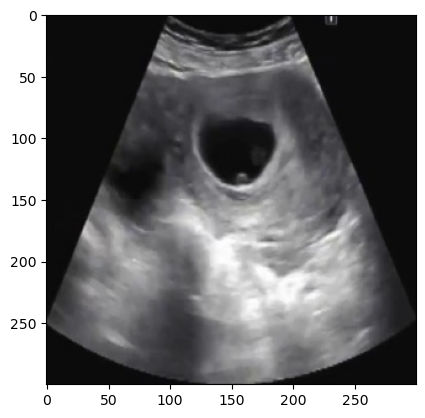

In [9]:
# an example of how the images are inside the folders healthy and unhealthy
exampleImage=cv2.imread(os.path.join(train_data_dir,'healthy', '1image40.jpg'))
print(exampleImage)
print(exampleImage.shape)
# plt.imshow(exampleImage)
plt.imshow(cv2.cvtColor(exampleImage, cv2.COLOR_BGR2RGB))


In [ ]:
tf.data.Dataset??

In [10]:
# trainData=tf.keras.utils.image_dataset_from_directory('PCOS_Train',
#                                                       image_size=(256,256), 
#                                                       batch_size=32,
#                                                       label_mode='categorical',
#                                                       seed=123,
#                                                       shuffle=True)

trainData=tf.keras.utils.image_dataset_from_directory('PCOS_Train')
dataIterator=trainData.as_numpy_iterator()
batch=dataIterator.next()
batch



Found 3200 files belonging to 2 classes.


(array([[[[6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          ...,
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00]],
 
         [[6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          ...,
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00]],
 
         [[6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          [6.00000000e+00, 6.00000000e+00, 6.00000000e+00],
          ...,
          [6.00000000e+00, 6.00000000e+00, 6.0000

In [11]:
trainData

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# each batch is of size 32 and has 2 parts. the first part is the images and the second part is the labels
batch[0]
batch[0].shape
# batch[1]

(32, 256, 256, 3)

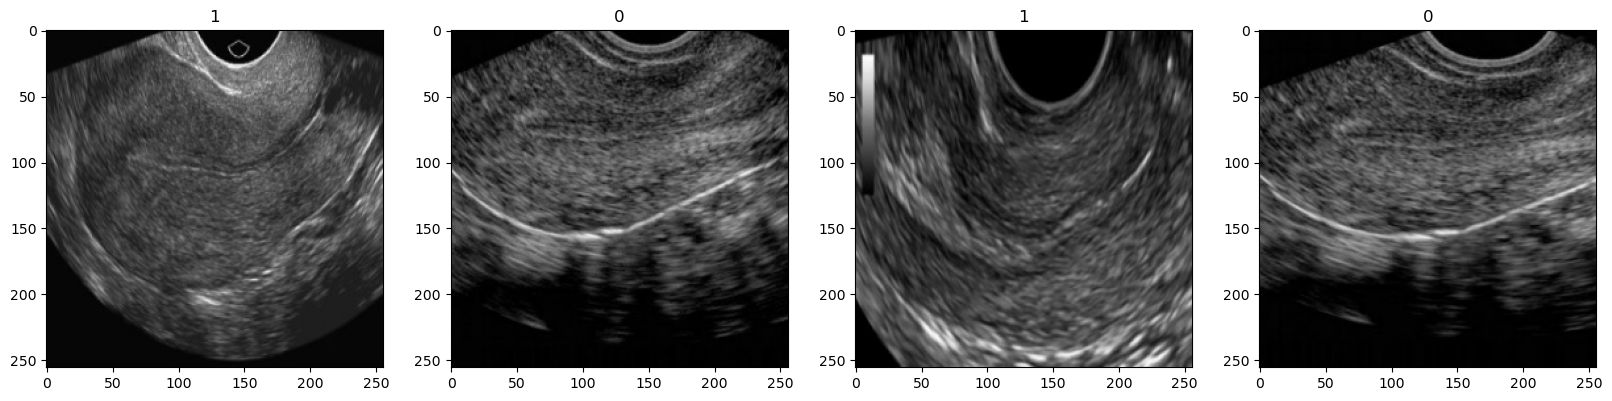

In [13]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    # print(os.path.abspath(img))

In [14]:
for i, class_name in enumerate(trainData.class_names):
    print(f"Label for class {class_name}: {i}")

Label for class healthy: 0
Label for class unhealthy: 1


In [15]:
trainData=trainData.map(lambda x,y: (x/255,y))

In [16]:
scaledIterator=trainData.as_numpy_iterator()

In [17]:
scaledIterator.next()[0].max()

1.0

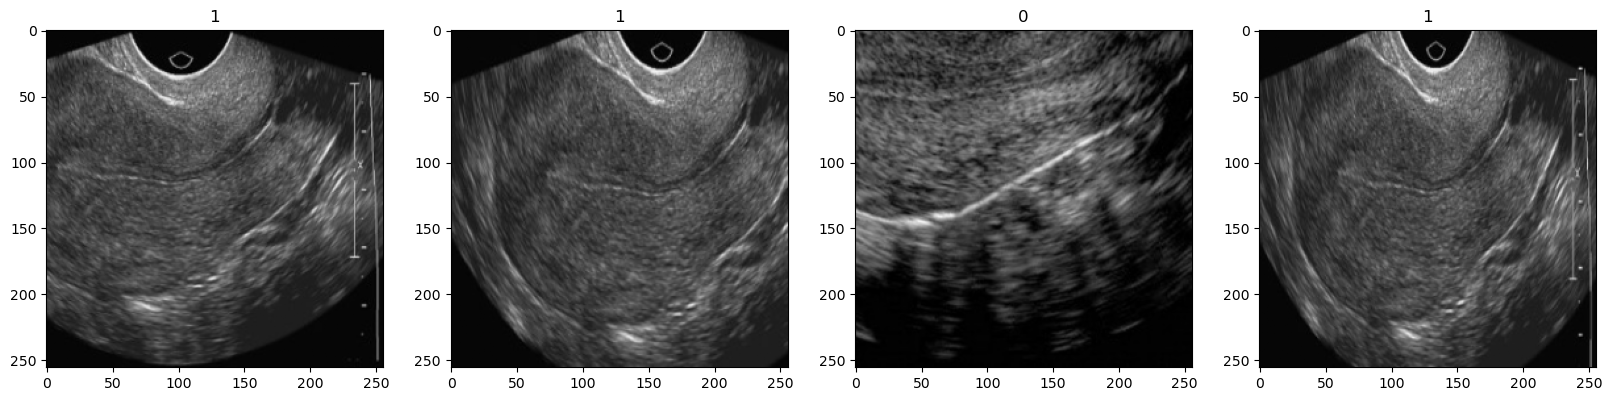

In [18]:
batch=scaledIterator.next()
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    # print(os.path.abspath(img))

In [19]:
batch[0].max()
batch[0].min()

0.0

In [20]:
len(trainData)

100

In [21]:
trainSize=int(len(trainData)*.7)
valSize=int(len(trainData)*.2)+1
testSize=int(len(trainData)*.1)+1

In [22]:
valSize
trainSize
testSize

11

In [23]:
train=trainData.take(trainSize)
val=trainData.skip(trainSize).take(valSize)
test=trainData.skip(trainSize+valSize).take(testSize)

# train=trainData.take(len(trainData))
# val=trainData.take(valSize)
# test=trainData.take(testSize)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [40]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
# type(train)
# len(train)
# train[0]

In [28]:
# trainingImages=[]
# trainingLabels=[]
# validationImages=[]
# validationLabels=[]

# for image, label in train:
#     trainingImages.append(image.numpy())
#     trainingLabels.append(label.numpy())

# trainingImages=np.array(trainingImages)
# trainingLabels=np.array(trainingLabels)

2024-04-24 00:50:17.110394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:



dataGeneratorObject=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=18,
    zoom_range=18,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'

)

augmentedTrain=[]
for img in trainingImages:
    augmentedImg=dataGeneratorObject.random_transform(img)
    augmentedTrain.append(augmentedImg)

augmentedTrain=np.array(augmentedTrain)
augmentedTrainGenerator=tf.data.dataset.from_tensor_slices(augmentedTrain, trainingLabels)
augmentedTrainGenerator=augmentedTrainGenerator.shuffle(buffer_size=len(augmentedTrain)).batch(32)

for image, label in val:
    validationImages.append(image.numpy())
    validationLabels.append(label.numpy())

validationImages=np.array(validationImages)
validationLabels=np.array(validationLabels)

augmentedVal=[]
for img in validationImages:
    augmentedValidationImg=dataGeneratorObject.random_transform(img)
    augmentedVal.append(augmentedValidationImg)

augmentedVal=np.array(augmentedVal)
augmentedValGenerator=tf.data.dataset.from_tensor_slices(augmentedVal, validationLabels)
augmentedValGenerator=augmentedValGenerator.shuffle(buffer_size=len(augmentedVal)).batch(32)


augmentedTrainGenerator=dataGeneratorObject.flow(train)
augmentedValidateGenerator=dataGeneratorObject.flow(val)


In [25]:
# base_model=EfficientNetB0(weights='imagenet', include_top=False)
# model=Sequential([base_model, GlobalAveragePooling2D(), Dense(512, activation='relu'), Dense(1, activation='sigmoid')])

model=Sequential()

# model=tf.keras.Model(inputs, outputs)

In [ ]:
MaxPooling2D??

In [26]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/satyarth/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
# we can use different optimizers. I have used adam but there are several available. In order to check the list of optimizers available with tensorflow run the below line of code. When you put a dot after optimizers it will show the list available

# tf.optimizers.

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
logDirectory='logs'

In [30]:
tensorboardCallback=tf.keras.callbacks.TensorBoard(log_dir=logDirectory)

In [31]:
# hist=model.fit(augmentedTrainGenerator, epochs=15, validation_data=augmentedValidateGenerator, callbacks=[tensorboardCallback])
hist=model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboardCallback])

Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.6915 - loss: 0.6438

2024-05-08 12:01:47.821689: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 358ms/step - accuracy: 0.6917 - loss: 0.6429 - val_accuracy: 0.7470 - val_loss: 0.4750
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.7278 - loss: 0.5018

2024-05-08 12:02:12.883281: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 356ms/step - accuracy: 0.7279 - loss: 0.5016 - val_accuracy: 0.7753 - val_loss: 0.4527
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.7659 - loss: 0.4403

2024-05-08 12:02:37.887671: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 355ms/step - accuracy: 0.7660 - loss: 0.4402 - val_accuracy: 0.7634 - val_loss: 0.4363
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.7829 - loss: 0.4195

2024-05-08 12:03:03.046738: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 357ms/step - accuracy: 0.7831 - loss: 0.4192 - val_accuracy: 0.7634 - val_loss: 0.4285
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.8081 - loss: 0.3877

2024-05-08 12:03:27.912478: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 352ms/step - accuracy: 0.8082 - loss: 0.3875 - val_accuracy: 0.7768 - val_loss: 0.4120
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.8346 - loss: 0.3469

2024-05-08 12:03:52.812944: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 353ms/step - accuracy: 0.8347 - loss: 0.3466 - val_accuracy: 0.8021 - val_loss: 0.4833
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.8473 - loss: 0.3294

2024-05-08 12:04:17.962388: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 356ms/step - accuracy: 0.8473 - loss: 0.3293 - val_accuracy: 0.7753 - val_loss: 0.4886
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.8590 - loss: 0.3137

2024-05-08 12:04:42.884715: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 354ms/step - accuracy: 0.8590 - loss: 0.3134 - val_accuracy: 0.7708 - val_loss: 0.5119
Epoch 9/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.8723 - loss: 0.2696

2024-05-08 12:05:07.863311: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 353ms/step - accuracy: 0.8724 - loss: 0.2694 - val_accuracy: 0.7991 - val_loss: 0.5383
Epoch 10/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.8784 - loss: 0.2638

2024-05-08 12:05:32.778939: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 353ms/step - accuracy: 0.8785 - loss: 0.2635 - val_accuracy: 0.8155 - val_loss: 0.5857
Epoch 11/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.8860 - loss: 0.2664

2024-05-08 12:06:13.708718: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 352ms/step - accuracy: 0.8862 - loss: 0.2660 - val_accuracy: 0.7842 - val_loss: 0.5676
Epoch 12/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.9085 - loss: 0.2051

2024-05-08 12:06:54.576216: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - accuracy: 0.9086 - loss: 0.2050 - val_accuracy: 0.7991 - val_loss: 0.7419
Epoch 13/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.9075 - loss: 0.2118

2024-05-08 12:07:35.499591: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - accuracy: 0.9075 - loss: 0.2117 - val_accuracy: 0.7798 - val_loss: 0.6350
Epoch 14/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9278 - loss: 0.1791

2024-05-08 12:08:00.105969: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 347ms/step - accuracy: 0.9278 - loss: 0.1792 - val_accuracy: 0.7664 - val_loss: 0.6115
Epoch 15/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9307 - loss: 0.1749

2024-05-08 12:08:24.121121: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.9307 - loss: 0.1750 - val_accuracy: 0.7946 - val_loss: 0.6032
Epoch 16/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9184 - loss: 0.1874

2024-05-08 12:08:48.104340: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 341ms/step - accuracy: 0.9185 - loss: 0.1873 - val_accuracy: 0.7961 - val_loss: 0.6492
Epoch 17/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9292 - loss: 0.1671

2024-05-08 12:09:12.153783: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 340ms/step - accuracy: 0.9292 - loss: 0.1671 - val_accuracy: 0.8021 - val_loss: 0.6361
Epoch 18/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9358 - loss: 0.1523

2024-05-08 12:09:36.132465: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 342ms/step - accuracy: 0.9358 - loss: 0.1524 - val_accuracy: 0.7842 - val_loss: 0.6826
Epoch 19/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9398 - loss: 0.1421

2024-05-08 12:10:00.119701: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.9397 - loss: 0.1421 - val_accuracy: 0.7932 - val_loss: 0.5650
Epoch 20/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9411 - loss: 0.1414

2024-05-08 12:10:23.905074: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9412 - loss: 0.1413 - val_accuracy: 0.7783 - val_loss: 0.7101
Epoch 21/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9355 - loss: 0.1488

2024-05-08 12:10:47.804561: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.9356 - loss: 0.1487 - val_accuracy: 0.7917 - val_loss: 0.7150
Epoch 22/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9490 - loss: 0.1364

2024-05-08 12:11:11.596011: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 336ms/step - accuracy: 0.9490 - loss: 0.1365 - val_accuracy: 0.7976 - val_loss: 0.7420
Epoch 23/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9506 - loss: 0.1286

2024-05-08 12:11:35.478827: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.9506 - loss: 0.1286 - val_accuracy: 0.7991 - val_loss: 0.7907
Epoch 24/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9463 - loss: 0.1331

2024-05-08 12:11:59.374982: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.9464 - loss: 0.1329 - val_accuracy: 0.7961 - val_loss: 0.6772
Epoch 25/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9473 - loss: 0.1096

2024-05-08 12:12:40.241032: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 338ms/step - accuracy: 0.9474 - loss: 0.1096 - val_accuracy: 0.8036 - val_loss: 0.7969
Epoch 26/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9484 - loss: 0.1105

2024-05-08 12:13:04.099690: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9485 - loss: 0.1104 - val_accuracy: 0.8036 - val_loss: 0.9401
Epoch 27/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9543 - loss: 0.1061

2024-05-08 12:13:27.955649: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9544 - loss: 0.1060 - val_accuracy: 0.7917 - val_loss: 0.7900
Epoch 28/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9575 - loss: 0.0996

2024-05-08 12:13:51.945019: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.9576 - loss: 0.0994 - val_accuracy: 0.8051 - val_loss: 0.9945
Epoch 29/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9575 - loss: 0.1058

2024-05-08 12:14:15.770265: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9575 - loss: 0.1056 - val_accuracy: 0.7872 - val_loss: 0.9747
Epoch 30/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9652 - loss: 0.0785

2024-05-08 12:14:39.751164: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 340ms/step - accuracy: 0.9653 - loss: 0.0784 - val_accuracy: 0.8021 - val_loss: 1.1403
Epoch 31/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9698 - loss: 0.0781

2024-05-08 12:15:03.552748: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9698 - loss: 0.0781 - val_accuracy: 0.8080 - val_loss: 0.9347
Epoch 32/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9769 - loss: 0.0554

2024-05-08 12:15:27.341666: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9769 - loss: 0.0554 - val_accuracy: 0.8080 - val_loss: 0.9245
Epoch 33/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9747 - loss: 0.0717

2024-05-08 12:15:51.302873: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.9747 - loss: 0.0715 - val_accuracy: 0.8170 - val_loss: 0.9434
Epoch 34/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9673 - loss: 0.0775

2024-05-08 12:16:15.901843: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 347ms/step - accuracy: 0.9674 - loss: 0.0773 - val_accuracy: 0.8095 - val_loss: 0.9646
Epoch 35/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9801 - loss: 0.0430

2024-05-08 12:16:39.914387: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 341ms/step - accuracy: 0.9801 - loss: 0.0431 - val_accuracy: 0.8080 - val_loss: 0.9895
Epoch 36/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9800 - loss: 0.0480

2024-05-08 12:17:03.811203: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.9800 - loss: 0.0481 - val_accuracy: 0.8333 - val_loss: 0.7652
Epoch 37/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9800 - loss: 0.0499

2024-05-08 12:17:27.661359: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.9801 - loss: 0.0498 - val_accuracy: 0.8051 - val_loss: 0.9540
Epoch 38/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9776 - loss: 0.0483

2024-05-08 12:17:51.493039: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9776 - loss: 0.0482 - val_accuracy: 0.8110 - val_loss: 0.8582
Epoch 39/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9784 - loss: 0.0445

2024-05-08 12:18:15.320249: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.9784 - loss: 0.0445 - val_accuracy: 0.8140 - val_loss: 0.9837
Epoch 40/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9760 - loss: 0.0507

2024-05-08 12:18:39.178759: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.9761 - loss: 0.0506 - val_accuracy: 0.8110 - val_loss: 1.0171


In [32]:
hist.history

{'accuracy': [0.7049106955528259,
  0.7401785850524902,
  0.7745535969734192,
  0.7977678775787354,
  0.8129464387893677,
  0.8361607193946838,
  0.8446428775787354,
  0.8611606955528259,
  0.878125011920929,
  0.8883928656578064,
  0.8955357074737549,
  0.9125000238418579,
  0.9084821343421936,
  0.9236606955528259,
  0.9272321462631226,
  0.9209821224212646,
  0.925000011920929,
  0.934374988079071,
  0.9357143044471741,
  0.9441964030265808,
  0.9419642686843872,
  0.9464285969734192,
  0.9522321224212646,
  0.9522321224212646,
  0.9508928656578064,
  0.9571428298950195,
  0.9602678418159485,
  0.9620535969734192,
  0.9602678418159485,
  0.9705356955528259,
  0.9691964387893677,
  0.9745535850524902,
  0.9781249761581421,
  0.9750000238418579,
  0.9803571701049805,
  0.981249988079071,
  0.9839285612106323,
  0.9799107313156128,
  0.9799107313156128,
  0.9803571701049805],
 'loss': [0.5822993516921997,
  0.4917392134666443,
  0.43691307306289673,
  0.40213921666145325,
  0.378282040

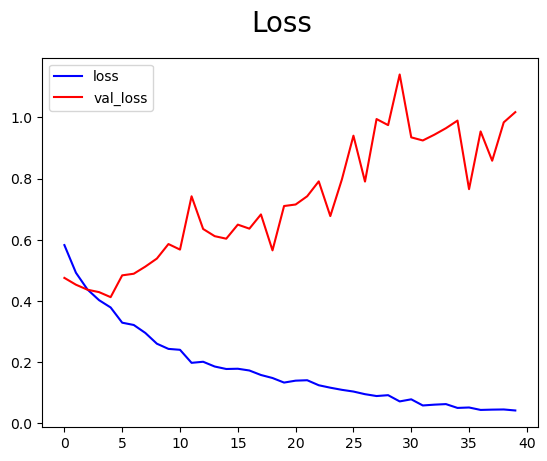

In [33]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

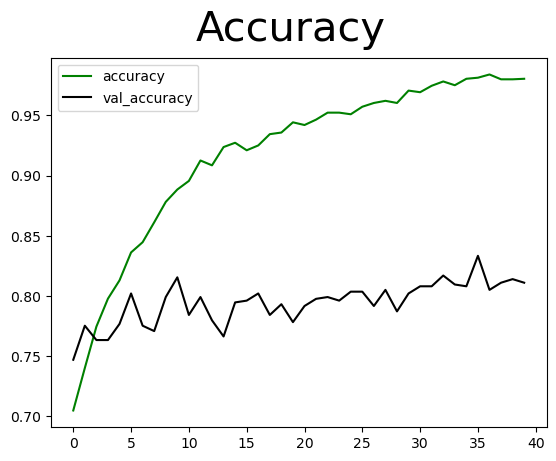

In [34]:
secondFig=plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='black', label='val_accuracy')
secondFig.suptitle("Accuracy", fontsize=30)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
precision=Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yPred=model.predict(x)
    precision.update_state(y,yPred)
    recall.update_state(y, yPred)
    accuracy.update_state(y, yPred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


2024-05-08 13:04:45.559235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
print(f"Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}")

Precision:0.829383909702301, Recall:0.7954545617103577, Accuracy:0.71875
